<a href="https://colab.research.google.com/github/garavellimafe/Solu-es-CP2/blob/main/Solu%C3%A7%C3%B5es_CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conjunto de Exercícios 1**

### **Parte 1**

In [ ]:
import pandas as pd

# Carregando o dataset
df = pd.read_csv('/content/energydata_complete.csv')

# Visualizar as primeiras linhas
print(df.head())

# Verificar colunas não numéricas (como 'date')
print("Colunas não numéricas:", df.select_dtypes(exclude=['number']).columns)

# Remover a coluna de data (se não for usada como variável)
df = df.drop('date', axis=1)

# Preencher valores ausentes nas colunas numéricas com a média
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Verificar se ainda há valores ausentes
print("Valores ausentes restantes:\n", df.isnull().sum().sum())




                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [ ]:
# Separar as variáveis
X = df.drop(['Appliances'], axis=1)  # Exclui a coluna de consumo de energia (target)
y = df['Appliances']  # A coluna que contém o consumo de energia


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Corrigido aqui
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.4f}')


MAE: 52.55
RMSE: 91.17
R²: 0.1693


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Criar e treinar o modelo
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Previsões
y_pred_tree = tree_model.predict(X_test)

# Métricas
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Árvore de Regressão -> MAE: {mae_tree:.2f}, RMSE: {rmse_tree:.2f}, R²: {r2_tree:.4f}')


Árvore de Regressão -> MAE: 38.87, RMSE: 90.60, R²: 0.1798


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

# Métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest -> MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}')


Random Forest -> MAE: 32.90, RMSE: 68.42, R²: 0.5322


In [ ]:
# Comparação dos resultados
resultados = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Árvore de Regressão', 'Random Forest'],
    'MAE': [mae, mae_tree, mae_rf],
    'RMSE': [rmse, rmse_tree, rmse_rf],
    'R²': [r2, r2_tree, r2_rf]
})

print(resultados)


                Modelo        MAE       RMSE        R²
0     Regressão Linear  52.547693  91.174826  0.169304
1  Árvore de Regressão  38.872561  90.596509  0.179809
2        Random Forest  32.900228  68.417501  0.532236


### **Conclusão:**

Com base nas métricas:

MAE (erro médio absoluto) — quanto menor, melhor.

RMSE — penaliza erros grandes, também deve ser o menor possível.

R² — quanto mais próximo de 1, melhor (indica o quanto o modelo explica a variabilidade dos dados).

Você pode então discutir:

Qual modelo teve melhor desempenho?

Houve overfitting (ex: Árvore com R² muito alto no treino mas baixo no teste)?

O Random Forest costuma ser o mais robusto nesse tipo de dado.

### **Parte 2**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados (faça upload do arquivo no Colab e ajuste o caminho, se necessário)
df = pd.read_csv('/content/smart_grid_stability_augmented.csv')

# Visualizar as primeiras linhas do dataset
print(df.head())


       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  


In [ ]:
# Nome da coluna alvo (mude se for diferente)
target_col = 'stabf'

# Separar features (X) e target (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamanho do conjunto de treino: {X_train.shape[0]}')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]}')


Tamanho do conjunto de treino: 48000
Tamanho do conjunto de teste: 12000



Matriz de Confusão - Árvore de Decisão:


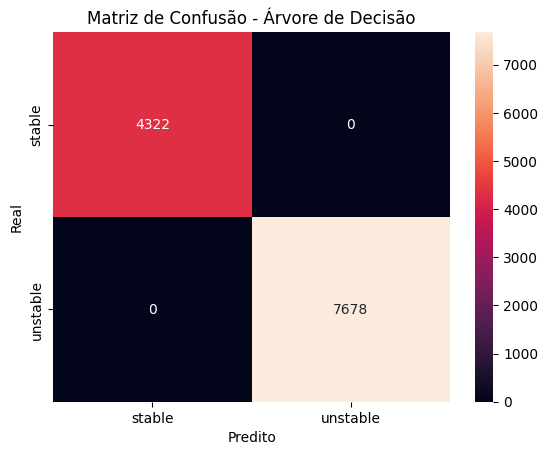


Matriz de Confusão - KNN:


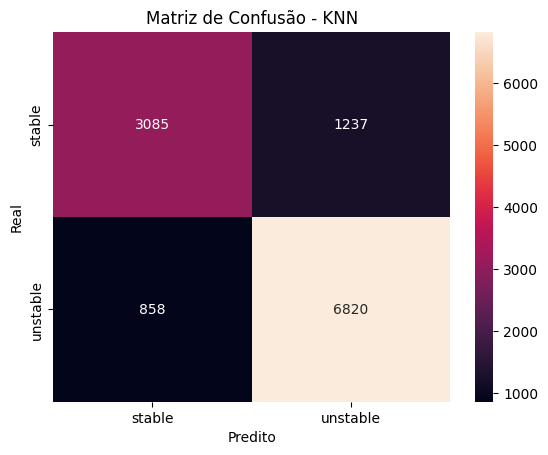


Matriz de Confusão - Regressão Logística:


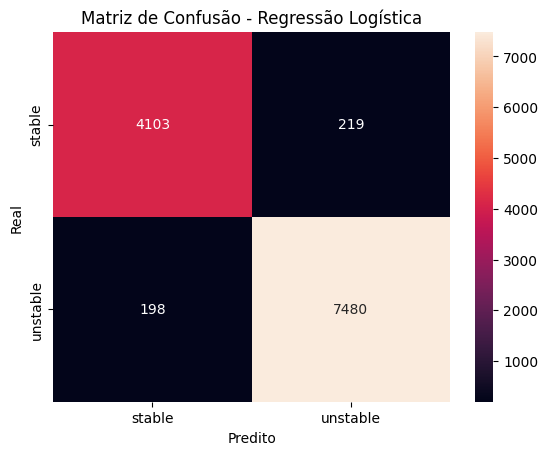

In [ ]:
# Inicializar os modelos
models = {
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Regressão Logística': LogisticRegression(max_iter=1000)
}

# Dicionário para armazenar métricas
results = {'Modelo': [], 'Acurácia': [], 'F1-Score': []}

# Loop para treinar, prever e avaliar cada modelo
for name, model in models.items():
    # Treinar modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)

    # Calcular F1-score (tenta usar 'stable' como classe positiva, senão calcula normalmente)
    try:
        f1 = f1_score(y_test, y_pred, pos_label='stable')
    except:
        f1 = f1_score(y_test, y_pred)

    # Armazenar resultados
    results['Modelo'].append(name)
    results['Acurácia'].append(acc)
    results['F1-Score'].append(f1)

    # Plotar matriz de confusão
    labels = sorted(y.unique())
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    print(f'\nMatriz de Confusão - {name}:')
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {name}')
    plt.show()


In [ ]:
# Mostrar os resultados em formato de tabela
results_df = pd.DataFrame(results)
print(results_df)


                Modelo  Acurácia  F1-Score
0    Árvore de Decisão  1.000000  1.000000
1                  KNN  0.825417  0.746521
2  Regressão Logística  0.965250  0.951641


# **Conjunto de exercícios 2**

### **Parte 1**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv('/content/SolarPrediction.csv')

# Mostrar primeiras linhas
print(df.head())


     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  


In [ ]:
# Converter coluna de data/hora para datetime (se existir, senão ignore)
if 'UNIXTime' in df.columns:
    df['Date'] = pd.to_datetime(df['UNIXTime'], unit='s')
elif 'Data' in df.columns:
    df['Date'] = pd.to_datetime(df['Data'], errors='coerce')

# Criar variável-alvo binária:
# 'Alta Radiação' se a radiação solar for maior que a mediana, 'Baixa Radiação' caso contrário
mediana = df['Radiation'].median()
df['Radiation_Level'] = df['Radiation'].apply(lambda x: 'Alta' if x > mediana else 'Baixa')

# Selecionar colunas de atributos (excluindo colunas não numéricas e target)
X = df.select_dtypes(include=['float64', 'int64']).drop(['Radiation'], axis=1)
y = df['Radiation_Level']

# Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar atributos contínuos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Matriz de Confusão - Árvore de Decisão:


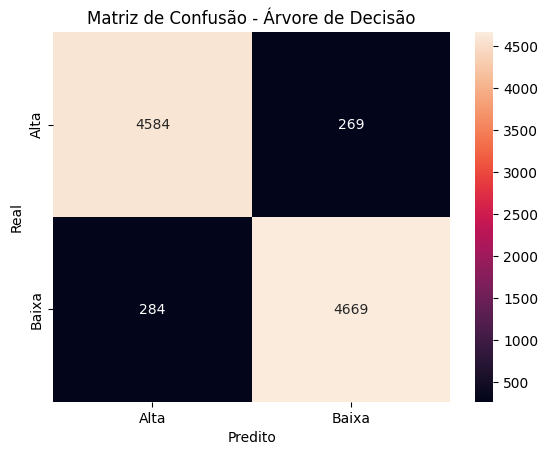


Matriz de Confusão - Random Forest:


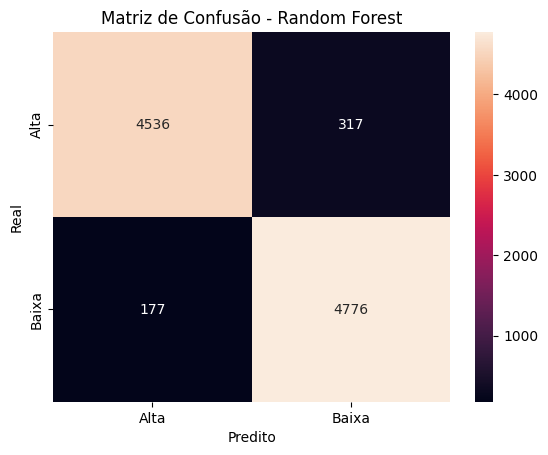


Matriz de Confusão - SVM:


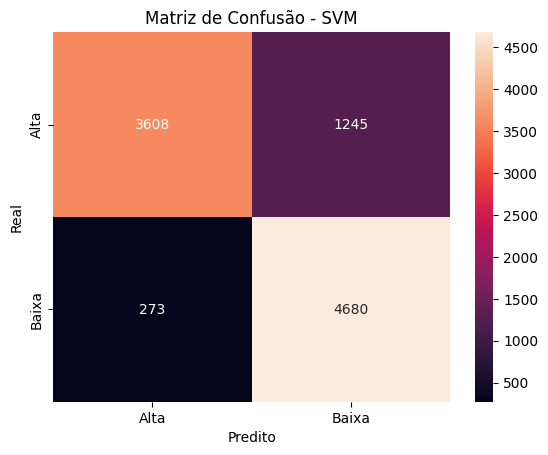

              Modelo  Acurácia
0  Árvore de Decisão  0.943606
1      Random Forest  0.949623
2                SVM  0.845197


In [ ]:
# Inicializar os modelos
models = {
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {'Modelo': [], 'Acurácia': []}

for name, model in models.items():
    # Treinar
    model.fit(X_train, y_train)

    # Prever
    y_pred = model.predict(X_test)

    # Avaliar
    acc = accuracy_score(y_test, y_pred)
    results['Modelo'].append(name)
    results['Acurácia'].append(acc)

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=['Alta', 'Baixa'])
    print(f'\nMatriz de Confusão - {name}:')
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Alta', 'Baixa'], yticklabels=['Alta', 'Baixa'])
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {name}')
    plt.show()

# Mostrar tabela comparativa
results_df = pd.DataFrame(results)
print(results_df)


### **Parte 2**

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Ler o arquivo CSV (certifique-se de que T1.csv está no mesmo diretório)
df = pd.read_csv("T1.csv")

# Exibir prévia dos dados
print("Prévia dos dados:")
display(df.head())

# Mostrar informações gerais (nomes das colunas, tipos, valores nulos)
print("\nInformações do dataset:")
print(df.info())


Prévia dos dados:


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB
None


In [ ]:
# Remover linhas com valores ausentes
df = df.dropna()

# Verifique os nomes das colunas:
print("\nColunas disponíveis:")
print(df.columns)

# ⚠️ Ajuste o nome da variável-alvo conforme o seu dataset
# Exemplo (dataset do Kaggle): 'LV ActivePower (kW)'
y = df['LV ActivePower (kW)']

# X são todas as outras colunas (features)
X = df.drop(columns=['LV ActivePower (kW)'])



Colunas disponíveis:
Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')


In [ ]:
# Separar dados em treino e teste (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamanho dos conjuntos:")
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)


Tamanho dos conjuntos:
Treino: (40424, 4)
Teste: (10106, 4)


In [ ]:
# 🔹 Garantir que só há colunas numéricas antes da normalização
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

# 🔹 Normalizar (padronizar) os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Criar dicionário de modelos
models = {
    'Regressão Linear': LinearRegression(),
    'Árvore de Regressão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# 🔹 Dicionário para armazenar resultados
results = {}

# 🔹 Treinar e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Armazenar resultados
    results[name] = {'RMSE': rmse, 'R²': r2}

    # Exibir resultados individuais
    print("="*50)
    print(f"Modelo: {name}")
    print(f"➡️ RMSE: {rmse:.2f}")
    print(f"➡️ R²: {r2:.3f}")

# 🔹 Comparativo final dos modelos
results_df = pd.DataFrame(results).T
print("\n📊 Comparativo de Desempenho:")
display(results_df)



Modelo: Regressão Linear
➡️ RMSE: 411.71
➡️ R²: 0.901
Modelo: Árvore de Regressão
➡️ RMSE: 538.79
➡️ R²: 0.830
Modelo: Random Forest
➡️ RMSE: 412.82
➡️ R²: 0.900

📊 Comparativo de Desempenho:


,RMSE,R²
Regressão Linear,411.710022,0.900660
Árvore de Regressão,538.790375,0.829870
Random Forest,412.822145,0.900123
